In [11]:
import pandas as pd
import re
from sklearn.utils import shuffle
import random as rand
import numpy as np
import math
import sklearn.naive_bayes as nB
from sklearn.model_selection import KFold, cross_val_score, cross_validate

In [12]:
data = pd.read_csv('games_clean.csv')
random = 24
data

,Presence,Memory,ReleaseDate,OriginalCost,DiscountedCost,Achievements,Storage,RatingsBreakdown-Recommended,RatingsBreakdown-Meh,RatingsBreakdown-Exceptional,...,Web Publishing,Well-Written,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,eSports
0,41.0,2000.0,2017.0,5.99,0.0,0.0,450.0,2.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
1,25415.0,1000.0,2012.0,3.99,0.0,44.0,120.0,4.0,9.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2,1421.0,4000.0,2016.0,1.99,0.0,0.0,2000.0,2.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
3,257.0,4000.0,2013.0,9.99,0.0,20.0,12000.0,2.0,2.0,1.0,...,False,False,False,False,False,False,False,False,False,False
4,250.0,256.0,2017.0,4.99,0.0,0.0,312.0,2.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,28.0,2000.0,2019.0,5.99,0.0,0.0,800.0,2.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
9996,647.0,4000.0,2019.0,19.99,0.0,50.0,3000.0,11.0,2.0,8.0,...,False,False,False,False,False,False,False,False,False,False
9997,308.0,1000.0,2016.0,7.99,0.0,0.0,500.0,2.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
9998,253.0,8000.0,2017.0,12.99,0.0,0.0,600.0,1.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False


In [13]:
for name in data.columns:
    print(name)

Presence
Memory
ReleaseDate
OriginalCost
DiscountedCost
Achievements
Storage
RatingsBreakdown-Recommended
RatingsBreakdown-Meh
RatingsBreakdown-Exceptional
RatingsBreakdown-Skip
Metacritic
Controller
Indie
Soundtrack
1980s
1990's
2.5D
2D
2D Fighter
2D Platformer
3D
3D Fighter
3D Platformer
3D Vision
4 Player Local
4X
6DOF
ATV
Abstract
Action
Action RPG
Action RTS
Action Roguelike
Action-Adventure
Addictive
Adventure
Agriculture
Aliens
Alternate History
Ambient
America
Animation & Modeling
Anime
Arabic
Arcade
Archery
Arena Shooter
Artificial Intelligence
Assassin
Asymmetric VR
Asynchronous Multiplayer
Atmospheric
Audio Production
Auto Battler
Automation
Automobile Sim
BMX
Base Building
Baseball
Based On A Novel
Basketball
Batman
Battle Royale
Beat 'em up
Beautiful
Bikes
Blood
Board Game
Bowling
Boxing
Building
Bulgarian
Bullet Hell
Bullet Time
CRPG
Capitalism
Card Battler
Card Game
Cartoon
Cartoony
Casual
Cats
Character Action Game
Character Customization
Chess
Choices Matter
Choose You

In [14]:
'''for name in data.columns[1:]:
    print("Before", name + '\n', data[data[name].isna()][name])
    data[name].fillna(data[name].mean(), inplace=True)
    print("After", name + '\n', data[data[name].isna()][name]'''

'for name in data.columns[1:]:\n    print("Before", name + \'\n\', data[data[name].isna()][name])\n    data[name].fillna(data[name].mean(), inplace=True)\n    print("After", name + \'\n\', data[data[name].isna()][name]'

In [15]:
data.isna().sum().sum()

0

In [16]:
data['Metacritic'].value_counts()

(73.573, 94.0]      2536
(68.619, 73.573]    2516
(63.527, 68.619]    2499
(19.999, 63.527]    2449
Name: Metacritic, dtype: int64

In [17]:
Labels = data['Metacritic'].unique()
Labels

array(['(68.619, 73.573]', '(73.573, 94.0]', '(19.999, 63.527]',
       '(63.527, 68.619]'], dtype=object)

In [18]:
'''from scipy.stats import boxcox

exponential = ['Presence', 'OriginalCost', 'Achievements', 'Storage', 'RatingsBreakdown-Recommended', 'RatingsBreakdown-Meh', 'RatingsBreakdown-Exceptional', 'RatingsBreakdown-Skip']
lambdas = {}

for name in exponential:
    boc = boxcox(data.loc[:,name].apply(lambda x: x + 1*10**(-10)))
    data.loc[:,name] = boc[0]
    print(name, boc[1])
    lambdas[name] = boc[1] '''

"from scipy.stats import boxcox\n\nexponential = ['Presence', 'OriginalCost', 'Achievements', 'Storage', 'RatingsBreakdown-Recommended', 'RatingsBreakdown-Meh', 'RatingsBreakdown-Exceptional', 'RatingsBreakdown-Skip']\nlambdas = {}\n\nfor name in exponential:\n    boc = boxcox(data.loc[:,name].apply(lambda x: x + 1*10**(-10)))\n    data.loc[:,name] = boc[0]\n    print(name, boc[1])\n    lambdas[name] = boc[1] "

In [19]:
for name in ['Presence', 'Memory', 'ReleaseDate', 'OriginalCost', 'DiscountedCost', 'Achievements', 'Storage', 'RatingsBreakdown-Recommended', 'RatingsBreakdown-Meh', 'RatingsBreakdown-Exceptional', 'RatingsBreakdown-Skip']:
    data.loc[:,name] = data[name].apply(lambda x: np.log2(x+0.000001))

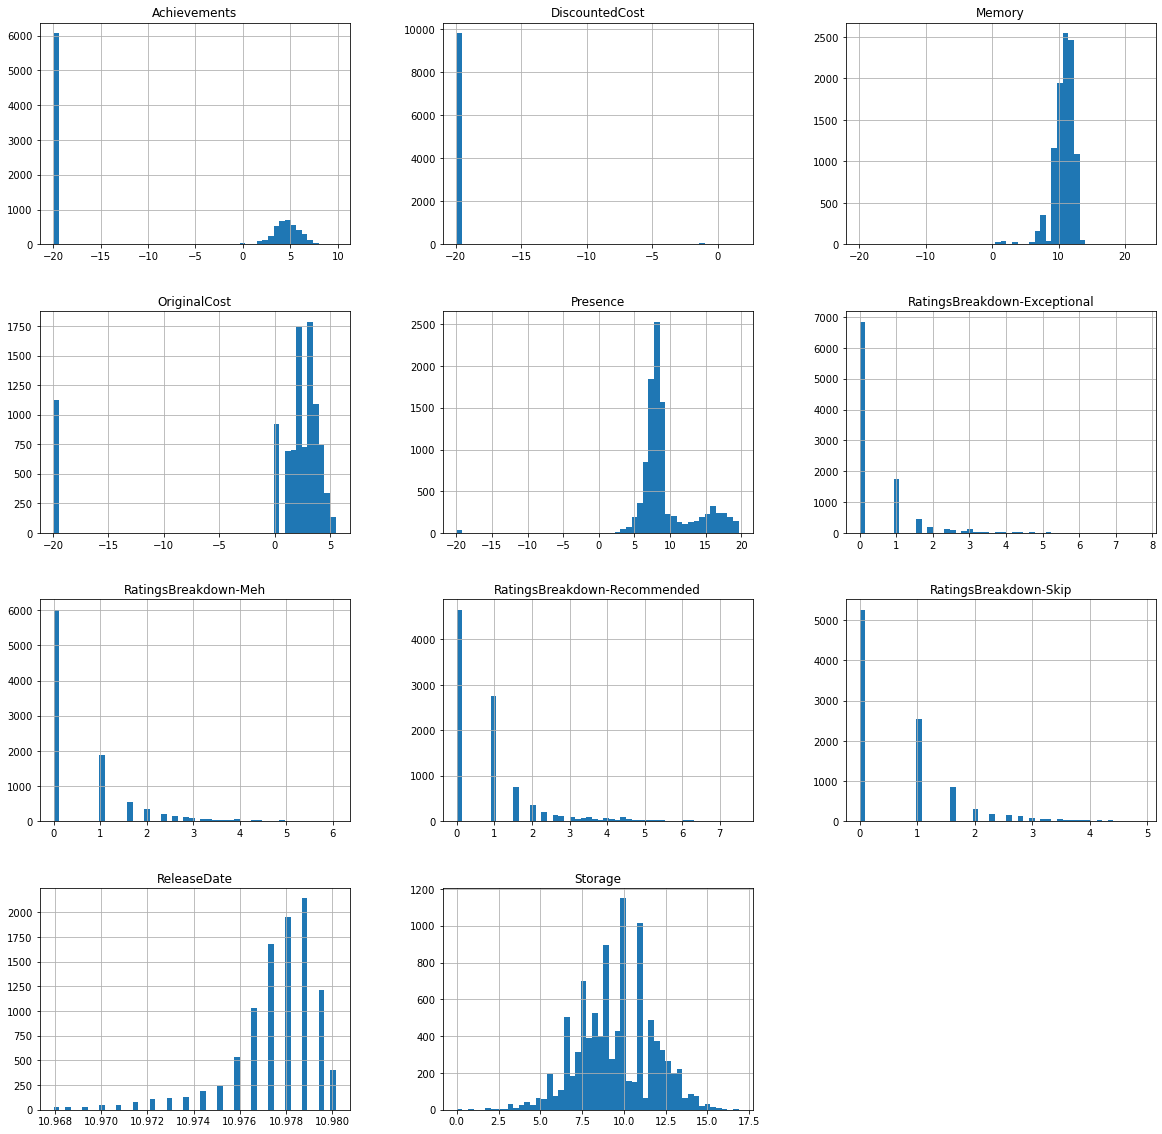

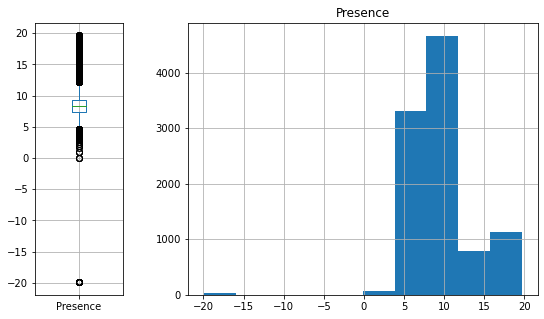

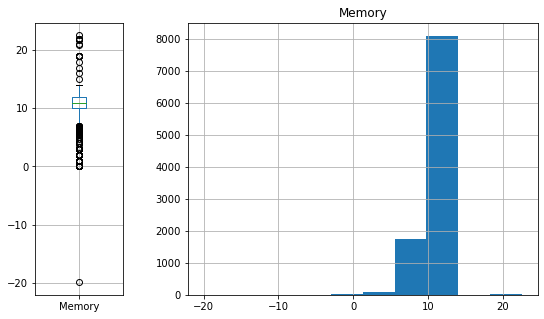

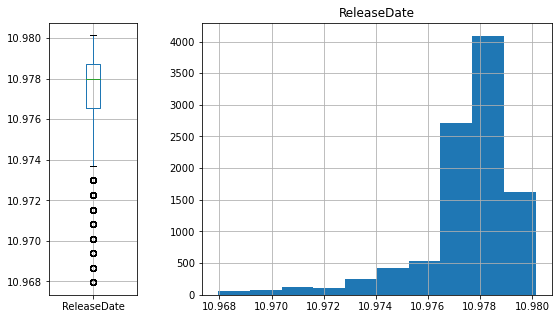

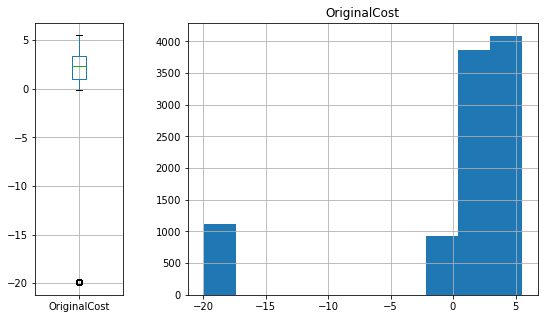

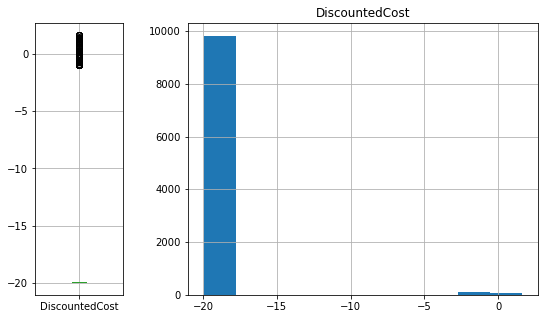

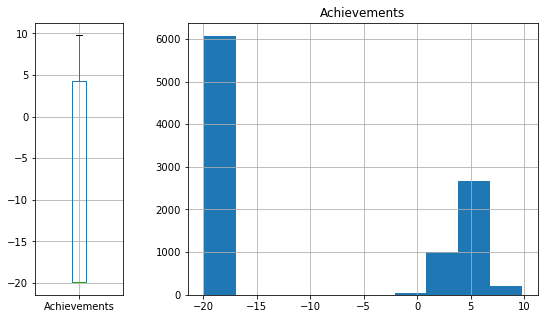

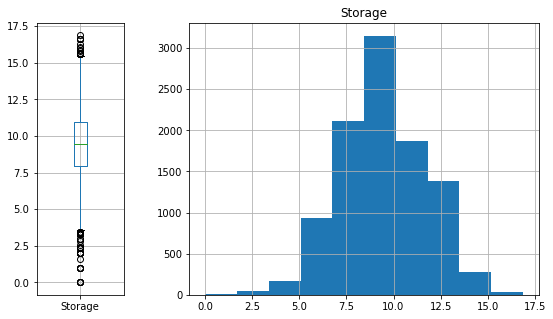

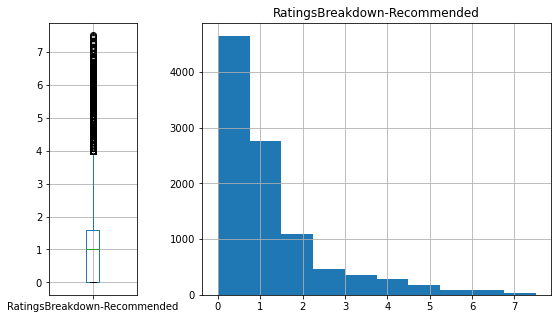

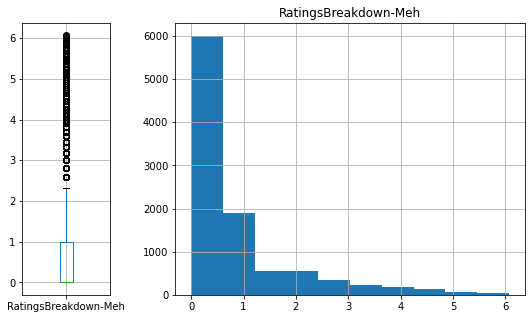

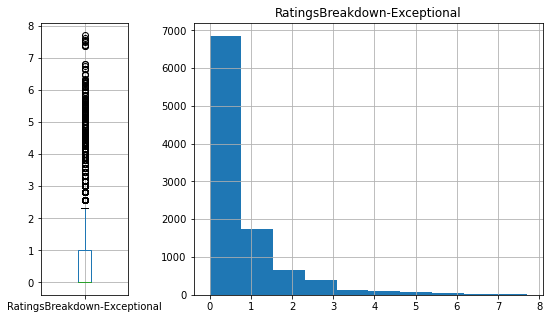

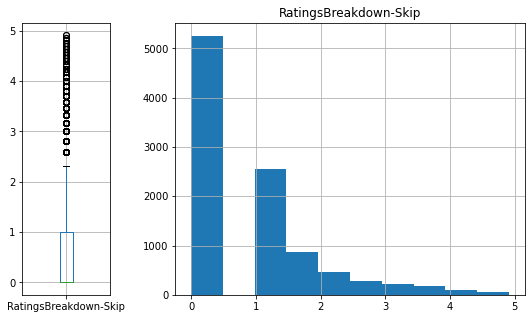

In [20]:
import matplotlib.pyplot as plt

data_analysis = data[['Presence',
'Memory',
'ReleaseDate',
'OriginalCost',
'DiscountedCost',
'Achievements',
'Storage',
'RatingsBreakdown-Recommended',
'RatingsBreakdown-Meh',
'RatingsBreakdown-Exceptional',
'RatingsBreakdown-Skip']]



hist = data_analysis.hist(bins=50, figsize=(20,20))
box = data_analysis.boxplot()
plt.xticks(rotation='vertical')
plt.xticks(rotation='horizontal')
for name in data_analysis.columns:
    fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
    data_analysis.boxplot(column=name,ax=axes[0])
    data_analysis.hist(column=name, ax=axes[1])
plt.show()

In [21]:
for name in data.columns:
    print('\033[1m'+name+'\033[0;0m')
    print(data[name].unique())

3983e+00 4.24792759e+00 5.20945340e+00 6.06608921e+00
 4.16992508e+00 4.70043977e+00 4.80735497e+00 4.00000009e+00
 5.12928306e+00 5.35755204e+00 5.00000005e+00 6.28540224e+00
 4.08746293e+00 6.12928304e+00 4.95419636e+00 5.24792755e+00
 4.52356202e+00 7.48381579e+00 6.97727993e+00 7.05528245e+00
 6.65821150e+00 6.68650054e+00 4.90689064e+00 5.08746288e+00
 5.45943165e+00 6.00000002e+00 5.52356199e+00 6.02236784e+00
 6.33985002e+00 7.33985001e+00 6.42626477e+00 5.32192813e+00
 6.45943164e+00 4.32192817e+00 6.80735493e+00 6.10852448e+00
 7.40939094e+00 5.72792048e+00 5.93073736e+00 6.83289003e+00
 5.70043975e+00 7.22881870e+00 6.04439414e+00 5.67242537e+00
 7.28540223e+00 5.95419633e+00 5.55458888e+00 5.61470987e+00
 5.78135974e+00 6.30378077e+00 5.75488753e+00 6.56985562e+00
 6.64385620e+00 6.20945339e+00 7.27612441e+00 6.08746286e+00
 6.93073735e+00 7.49984590e+00 6.26678656e+00 7.23840475e+00
 5.04439416e+00 6.79441588e+00 6.55458887e+00 6.39231744e+00
 6.32192811e+00 6.24792753e+00 

In [22]:
'''import matplotlib.pyplot as plt
cols = ['Presence', 'Memory', 'ReleaseDate', 'OriginalCost', 'DiscountedCost', 'Achievements', 'Storage', 'RatingsBreakdown-Recommended', 'RatingsBreakdown-Meh', 'RatingsBreakdown-Exceptional', 'RatingsBreakdown-Skip']

for name in cols:
    fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
    data.boxplot(column=name,ax=axes[0])
    data.hist(column=name, ax=axes[1])
plt.show()'''

"import matplotlib.pyplot as plt\ncols = ['Presence', 'Memory', 'ReleaseDate', 'OriginalCost', 'DiscountedCost', 'Achievements', 'Storage', 'RatingsBreakdown-Recommended', 'RatingsBreakdown-Meh', 'RatingsBreakdown-Exceptional', 'RatingsBreakdown-Skip']\n\nfor name in cols:\n    fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))\n    data.boxplot(column=name,ax=axes[0])\n    data.hist(column=name, ax=axes[1])\nplt.show()"

In [23]:
from sklearn import preprocessing

In [24]:
encoder = preprocessing.LabelEncoder()
Labels_encoded = encoder.fit_transform(Labels)
Labels_encoded

array([2, 3, 0, 1])

In [25]:
data_expected = encoder.fit_transform(data['Metacritic'])
data_input = data.loc[:, data.columns != 'Metacritic']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data_input, data_expected, test_size=0.3,random_state=404)

In [28]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [29]:
gnb = GaussianNB()
bnb = BernoulliNB(alpha=0.2)
mnb = MultinomialNB(alpha=1)

In [30]:
data['Metacritic'].dtype

dtype('O')

In [31]:
gnb.fit(X_train, y_train)

GaussianNB()

In [32]:
y_pred = gnb.predict(X_test)

In [33]:
pd.Series(encoder.inverse_transform(y_pred)).value_counts() 

(19.999, 63.527]    2322
(63.527, 68.619]     333
(73.573, 94.0]       217
(68.619, 73.573]     128
dtype: int64

In [34]:
y_pred = y_pred.reshape(3000,-1)

In [35]:
y_test = y_test.reshape(3000,-1)

In [36]:
print(y_pred[:5], y_test[:5])

[[0]
 [1]
 [3]
 [0]
 [0]] [[3]
 [1]
 [3]
 [1]
 [0]]


In [37]:
from sklearn.metrics import log_loss, accuracy_score

In [38]:
accuracy_score(y_test,y_pred)

0.2653333333333333

In [39]:
'''log_loss(y_test, y_pred)'''

'log_loss(y_test, y_pred)'

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.26      0.81      0.40       753
           1       0.29      0.13      0.18       747
           2       0.20      0.04      0.06       742
           3       0.30      0.09      0.13       758

    accuracy                           0.27      3000
   macro avg       0.26      0.26      0.19      3000
weighted avg       0.26      0.27      0.19      3000



In [41]:
all_accuracy_split = []
for i in range(20,100):
    print('')
    print('*-----------* KFOLD', i, '*-----------*')
    cv = KFold(n_splits=i, shuffle=False)
    cv_scores = cross_validate(bnb, X=X_train, y=y_train, cv=cv, scoring='accuracy', return_estimator=True)
    print('Max Accuracy in train', '--->', max([(sc,i) for i,sc in enumerate(cv_scores['test_score'])])[0])
    print('Mean Accuracy in train', '--->', np.mean(cv_scores['test_score']))
    all_accuracy_split.append(np.mean(cv_scores['test_score']))
    bnb = cv_scores['estimator'][max([(sc,i) for i,sc in enumerate(cv_scores['test_score'])])[1]]
    print('Max Accuracy in test', '--->', accuracy_score(y_test,bnb.predict(X_test)))
    print('')


*-----------* KFOLD 20 *-----------*
Max Accuracy in train ---> 0.35714285714285715
Mean Accuracy in train ---> 0.29728571428571426
Max Accuracy in test ---> 0.30433333333333334


*-----------* KFOLD 21 *-----------*
Max Accuracy in train ---> 0.3532934131736527
Mean Accuracy in train ---> 0.29927832023640405
Max Accuracy in test ---> 0.299


*-----------* KFOLD 22 *-----------*
Max Accuracy in train ---> 0.34276729559748426
Mean Accuracy in train ---> 0.29755516363134504
Max Accuracy in test ---> 0.30466666666666664


*-----------* KFOLD 23 *-----------*
Max Accuracy in train ---> 0.3519736842105263
Mean Accuracy in train ---> 0.29828000150054396
Max Accuracy in test ---> 0.29933333333333334


*-----------* KFOLD 24 *-----------*
Max Accuracy in train ---> 0.3424657534246575
Mean Accuracy in train ---> 0.2989877057540523
Max Accuracy in test ---> 0.3


*-----------* KFOLD 25 *-----------*
Max Accuracy in train ---> 0.39285714285714285
Mean Accuracy in train ---> 0.2987142857142857
Ma

In [42]:
all_accuracy = []
for i in range(20,100):
    print('')
    print('*-----------* KFOLD', i, '*-----------*')
    cv = KFold(n_splits=i, shuffle=False)
    cv_scores = cross_validate(bnb, X=data_input, y=data_expected, cv=cv, scoring='accuracy', return_estimator=True)
    print('Max Accuracy in train', '--->', max([(sc,i) for i,sc in enumerate(cv_scores['test_score'])])[0])
    print('Mean Accuracy in train', '--->', np.mean(cv_scores['test_score']))
    all_accuracy.append(np.mean(cv_scores['test_score']))
    bnb = cv_scores['estimator'][max([(sc,i) for i,sc in enumerate(cv_scores['test_score'])])[1]]
    print('Max Accuracy in test', '--->', accuracy_score(data_expected,bnb.predict(data_input)))
    print('')


*-----------* KFOLD 20 *-----------*
Max Accuracy in train ---> 0.32
Mean Accuracy in train ---> 0.2945999999999999
Max Accuracy in test ---> 0.3439


*-----------* KFOLD 21 *-----------*
Max Accuracy in train ---> 0.3333333333333333
Mean Accuracy in train ---> 0.29289724275454415
Max Accuracy in test ---> 0.3424


*-----------* KFOLD 22 *-----------*
Max Accuracy in train ---> 0.3384615384615385
Mean Accuracy in train ---> 0.2922920691643159
Max Accuracy in test ---> 0.3427


*-----------* KFOLD 23 *-----------*
Max Accuracy in train ---> 0.3195402298850575
Mean Accuracy in train ---> 0.29369600913828803
Max Accuracy in test ---> 0.3433


*-----------* KFOLD 24 *-----------*
Max Accuracy in train ---> 0.3213429256594724
Mean Accuracy in train ---> 0.2925959712998832
Max Accuracy in test ---> 0.3421


*-----------* KFOLD 25 *-----------*
Max Accuracy in train ---> 0.325
Mean Accuracy in train ---> 0.29510000000000003
Max Accuracy in test ---> 0.3459


*-----------* KFOLD 26 *---------

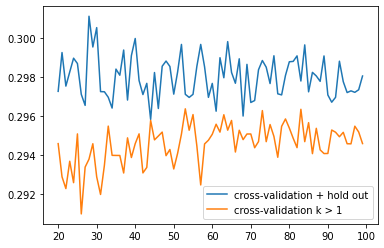

In [46]:
plt.plot(list(range(20,100)), all_accuracy_split, label = "cross-validation + hold out")
plt.plot(list(range(20,100)), all_accuracy, label = "cross-validation k > 1")
plt.legend()
plt.show()